In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from src.util import calculate_convexity_ratio, non_boundary_convexity, non_boundary_convexity_two_types
import numpy as np
from scipy.ndimage import label as nd_label
from src.util import color_code_cells
from src.cpm_basic import CellularPottsModel
import os
import os
from concurrent.futures import ProcessPoolExecutor
from src.parallel_simulation import run_parallel
from collections import defaultdict

In [32]:
n_cells=105
n_types=2 
T=26
L=150
J = 500
J_medium = J
type_percentages= [1/6, 5/6]  # cell type 1, cell type 2 percentages
adhessions= np.array([[0,        J_medium, J_medium],  
                      [J_medium, J,        J],
                      [J_medium, J,        J]]) 
volume_coefficient= np.array([0, 2, 2])
perimeter_coefficient= np.array([0, 1, 1])
lattice_type="honeycomb_surrounded_cell"
object_volumes=None # Is default set in the CPM class if none
periodic=False

# for parallel processing
param = {
    "n_cells": n_cells,
    "n_types": n_types,
    "T": T,
    "L": L,
    "type_percentages": type_percentages,
    "adhesions": adhessions,
    "volume_coefficient": volume_coefficient,
    "perimeter_coefficient": perimeter_coefficient,
    "lattice_type": lattice_type,
    "object_volumes": object_volumes,
    "periodic": periodic, 
    "steps": 100_000}

# Time Development

In [3]:
EN = []
init = ["hex", "honeycomb","surrounded_cell", "honeycomb_surrounded_cell", ]
for i in range(len(init)):
    cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, type_percentages=type_percentages,
                             volume_coefficient=volume_coefficient, perimeter_coefficient=perimeter_coefficient,
                             adhessions=adhessions, lattice_type=init[i], object_volumes=object_volumes, periodic=periodic)
    energy = cpm.run_time_development_sim(steps=5_000_000, interval=50_000)
    EN.append(energy)

with open("energy_time_development.pkl", "wb") as f:
    pickle.dump((EN, init), f)

100%|██████████| 5000000/5000000 [16:32<00:00, 5037.84it/s]


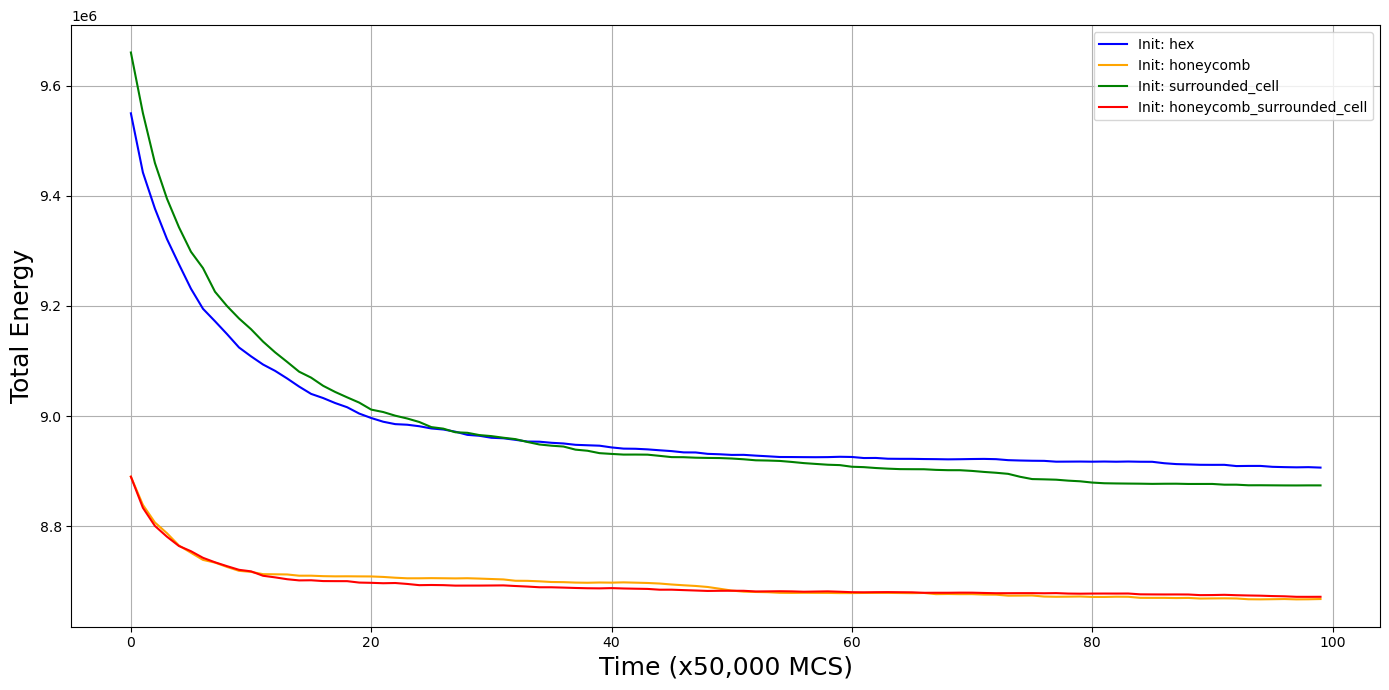

In [16]:
fig, ax = plt.subplots(figsize=(14, 7))
colors = ["blue", "orange", "green", "red"]
for i in range(len(EN)):
    ax.plot(range(len(EN[0])), EN[i], label=f"Init: {init[i]}", color=colors[i])

ax.set_xlabel("Time (x50,000 MCS)", fontsize=18)
ax.set_ylabel("Total Energy", fontsize=18)
ax.legend()
ax.grid()
fig.tight_layout()
fig.savefig("figures/time_dev.pdf", dpi=300)

# Null Model

In [19]:
repeat = 10
beta_1 = 0.01
steps = 1_000_000
beta_2 = np.linspace(beta_1, beta_1*1000, 10)

GRIDS = []  # will be of shape (len(beta_2), repeat, L, L)
TYPES = []

for b2 in beta_2:
    print("Beta:", b2)
    perimeter_coefficient= np.array([0, b2, b2])
    param = {
    "n_cells": n_cells,
    "n_types": n_types,
    "T": T,
    "L": L,
    "type_percentages": type_percentages,
    "adhesions": adhessions,
    "volume_coefficient": volume_coefficient,
    "perimeter_coefficient": perimeter_coefficient,
    "lattice_type": lattice_type,
    "object_volumes": object_volumes,
    "periodic": periodic, 
    "steps": steps}
    res = run_parallel(repeat, param, max_workers=repeat)
    grids, types = zip(*res)
    GRIDS.append(grids)
    TYPES.append(types)

Beta: 0.01
Beta: 1.12
Beta: 2.23
Beta: 3.34
Beta: 4.45
Beta: 5.5600000000000005
Beta: 6.67
Beta: 7.78
Beta: 8.89
Beta: 10.0


In [20]:
with open("saves/vol_per_scan_honeycomb/null_model_sweep_beta1_0_1.pkl", "wb") as f:
    pickle.dump((GRIDS, TYPES, beta_2), f)

# Perimeter Parameter Scan

In [ ]:
repeat = 10
beta_1 = 0.01
steps = 1_000_000
beta_2 = np.linspace(beta_1, beta_1*1000, 10)

GRIDS = []  # will be of shape (len(beta_2), repeat, L, L)
TYPES = []

for b2 in beta_2:
    print("Beta:", b2)
    perimeter_coefficient= np.array([0, beta_1, b2])
    param = {
    "n_cells": n_cells,
    "n_types": n_types,
    "T": T,
    "L": L,
    "type_percentages": type_percentages,
    "adhesions": adhessions,
    "volume_coefficient": volume_coefficient,
    "perimeter_coefficient": perimeter_coefficient,
    "lattice_type": lattice_type,
    "object_volumes": object_volumes,
    "periodic": periodic, 
    "steps": steps}
    res = run_parallel(repeat, param, max_workers=repeat)
    grids, types = zip(*res)
    GRIDS.append(grids)
    TYPES.append(types)

In [4]:
with open("saves/vol_per_scan_honeycomb/perimeter_sweep_beta1_0_1.pkl", "wb") as f:
    pickle.dump((GRIDS, TYPES, beta_2), f)

# Volume Scan 

In [5]:
repeat = 10
lambda_1 = 0.01
steps = 1_000_000
lambda_2 = np.linspace(lambda_1, lambda_1*100, 10)

GRIDS = []  # will be of shape (len(beta_2), repeat, L, L)
TYPES = []

for l2 in lambda_2:
    print("Processing lambda_2 =", l2)
    volume_coefficient= np.array([0, lambda_1, l2])
    param = {
    "n_cells": n_cells,
    "n_types": n_types,
    "T": T,
    "L": L,
    "type_percentages": type_percentages,
    "adhesions": adhessions,
    "volume_coefficient": volume_coefficient,
    "perimeter_coefficient": 0,
    "lattice_type": lattice_type,
    "object_volumes": object_volumes,
    "periodic": periodic, 
    "steps": steps}
    res= run_parallel(repeat, param, max_workers=repeat)
    grids, types = zip(*res)
    GRIDS.append(grids)
    TYPES.append(types)

Processing lambda_2 = 0.01
Processing lambda_2 = 0.12
Processing lambda_2 = 0.23
Processing lambda_2 = 0.34
Processing lambda_2 = 0.45
Processing lambda_2 = 0.56
Processing lambda_2 = 0.67
Processing lambda_2 = 0.78
Processing lambda_2 = 0.89
Processing lambda_2 = 1.0


In [9]:
with open("saves/vol_per_scan_honeycomb/volume_sweep_lambda1_0_1.pkl", "wb") as f:
    pickle.dump((GRIDS, TYPES, lambda_2), f)

# Plot the Convexity

In [6]:
def convexity_analysis(GRIDS, TYPES):
    CONVEXITY_CELL_TYPE_1 = []
    CONVEXITY_CELL_TYPE_2 = []
    for i in range(len(GRIDS)):  # over parameter sets
        convexity_type_1 = []
        convexity_type_2 = []
        for j in range(len(GRIDS[i])): # over repeats for each parameter set
            convexity_1, convexity_2, _ = non_boundary_convexity_two_types(GRIDS[i][j], TYPES[i][j])
            convexity_type_1.extend(convexity_1)
            convexity_type_2.extend(convexity_2)
        CONVEXITY_CELL_TYPE_1.append(convexity_type_1)
        CONVEXITY_CELL_TYPE_2.append(convexity_type_2)
    return CONVEXITY_CELL_TYPE_1, CONVEXITY_CELL_TYPE_2

In [7]:
def violin_plot(CON1, CON2, placements_label):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    spacing = 1.8   # increase this for more space
    for i in range(len(CON1)):
        x = i * spacing
        c1 = ax.violinplot(CON1[i],
                           positions=[x],
                           widths=0.6,
                           showmedians=True)

        c2 = ax.violinplot(CON2[i],
                           positions=[x + 0.5],
                           widths=0.6,
                           showmedians=True)

        for pc in c1['bodies']:
            pc.set_facecolor('blue')
            pc.set_edgecolor('black')
            pc.set_alpha(0.7)

        for pc in c2['bodies']:
            pc.set_facecolor('tomato')
            pc.set_edgecolor('black')
            pc.set_alpha(0.7)

        for key in ('cmedians', 'cmins', 'cmaxes', 'cbars'):
            if key in c1:
                c1[key].set_color('skyblue')
                c1[key].set_linewidth(1.5)
            if key in c2:
                c2[key].set_color('red')
                c2[key].set_linewidth(1.5)
    ax.set_xticks([i * spacing + 0.25 for i in range(len(CON1))])
    ax.set_xticklabels(placements_label, rotation=45)
    ax.set_xlabel(r"Perimeter Coefficient of Cell Type 2 $[\beta_1 \cdot X]$", fontsize=17)
    ax.set_ylabel("Convexity Ratio", fontsize=17)
    fig.tight_layout()
    fig.savefig("figures/convexity_perimeter_sweep.pdf", dpi=300)


In [8]:
def mean_error_plot(CONVEXITY_CELL_TYPE_1, CONVEXITY_CELL_TYPE_2, param_values):
    mean_1, error_1 = [], []
    mean_2, error_2 = [], []
    median_1, median_2 = [], []

    for i in range(len(param_values)):
        mean_1.append(np.mean(CONVEXITY_CELL_TYPE_1[i]))
        mean_2.append(np.mean(CONVEXITY_CELL_TYPE_2[i]))
        error_1.append(np.std(CONVEXITY_CELL_TYPE_1[i]) / np.sqrt(len(CONVEXITY_CELL_TYPE_1[i])))
        error_2.append(np.std(CONVEXITY_CELL_TYPE_2[i]) / np.sqrt(len(CONVEXITY_CELL_TYPE_2[i])))
        median_1.append(np.median(CONVEXITY_CELL_TYPE_1[i]))
        median_2.append(np.median(CONVEXITY_CELL_TYPE_2[i]))
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 7))
    ax.errorbar(param_values, mean_1, yerr=error_1,
                fmt='-o', color='blue', label='Mean of Cell Type 1', capsize=5)
    ax.errorbar(param_values, mean_2, yerr=error_2,
                fmt='-o', color='red', label='Mean of Cell Type 2', capsize=5)
    ax.plot(param_values, median_1, 'x-', color='skyblue', label='Median of Cell Type 1')
    ax.plot(param_values, median_2, 'x-', color='tomato', label='Median of Cell Type 2')
    ax.set_xlabel("Parameter Value", fontsize=17)
    ax.set_ylabel("Convexity Ratio", fontsize=17)
    ax.legend(fontsize=15)
    ax.grid()
    fig.tight_layout()
    fig.savefig("figures/mean_error_convexity.pdf", dpi=300)

In [29]:
with open("saves/vol_per_scan_honeycomb/perimeter_sweep_beta1_0_1.pkl", "rb") as f:
    GRIDS_PER, TYPES_PER, beta_2_per = pickle.load(f)

with open("saves/vol_per_scan_honeycomb/volume_sweep_lambda1_0_1.pkl", "rb") as f: 
    GRID_VOL, TYPES_VOL, lambda_2_per = pickle.load(f)

with open("saves/vol_per_scan_honeycomb/null_model_sweep_beta1_0_1.pkl", "rb") as f:
    GRIDS_NULL, TYPES_NULL, beta_2_null = pickle.load(f)

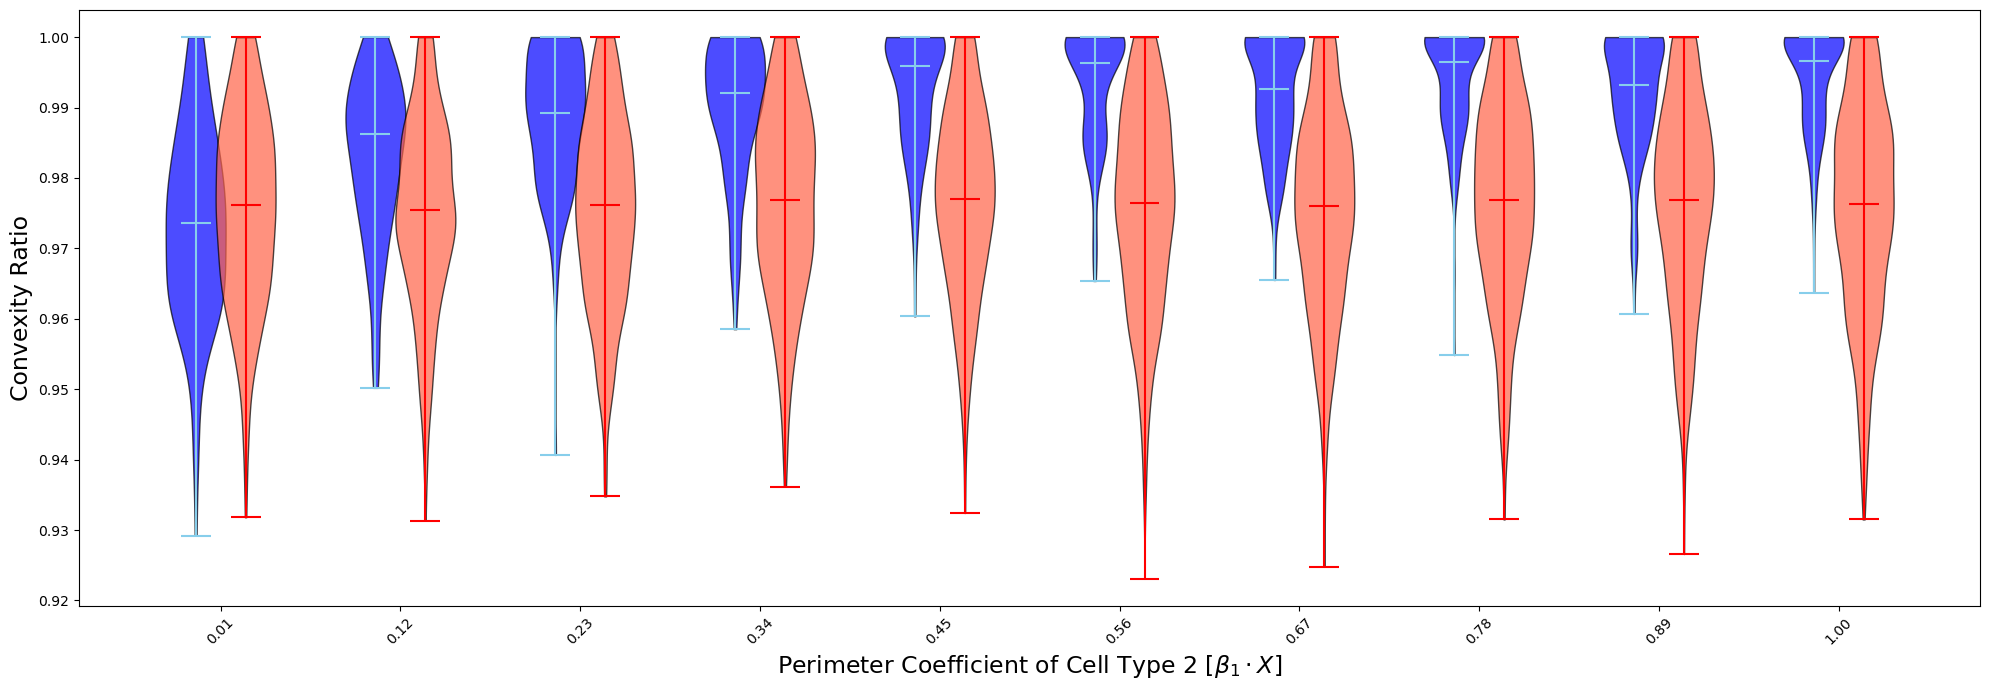

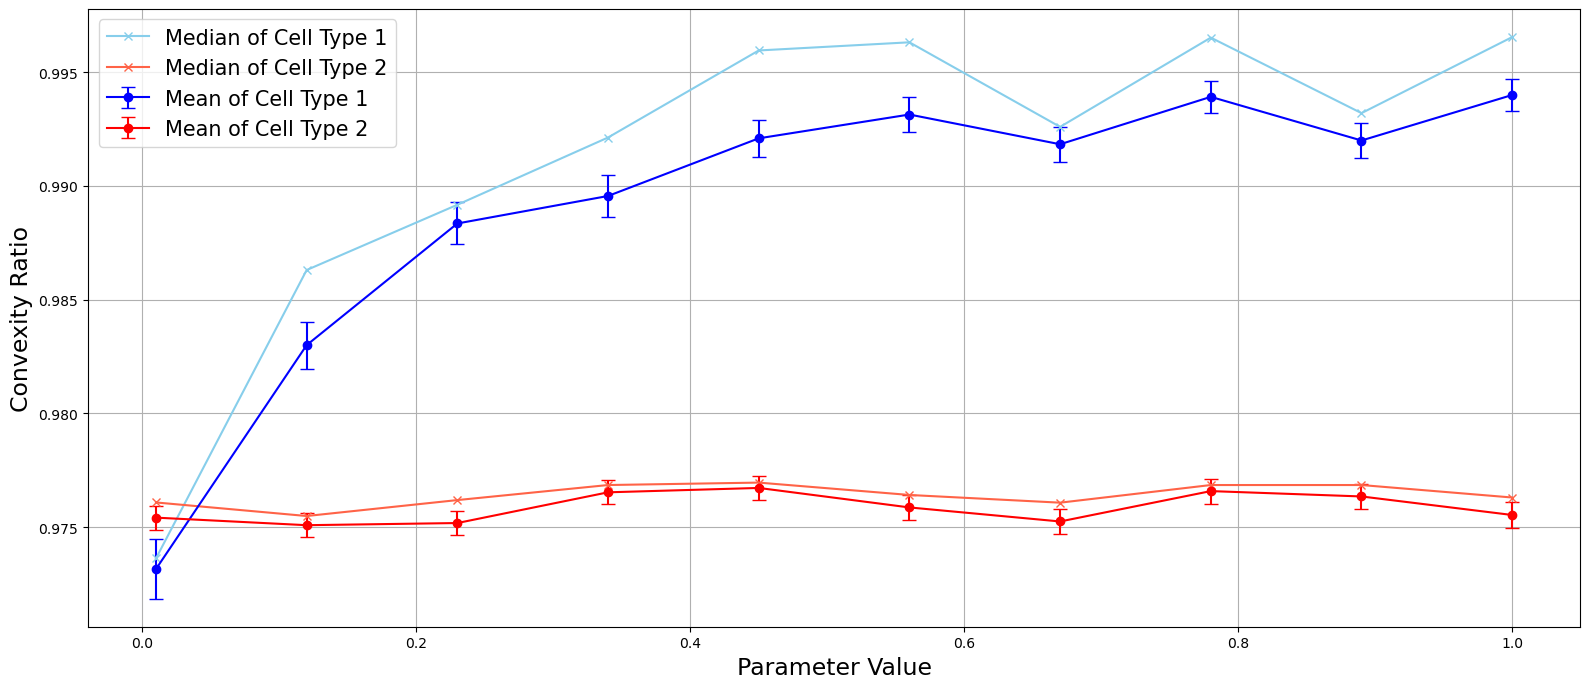

In [16]:
CONVEXITY_CELL_TYPE_1, CONVEXITY_CELL_TYPE_2 = convexity_analysis(GRIDS, TYPES)
placements_label = [f"{b2:.2f}" for b2 in beta_2]
violin_plot(CONVEXITY_CELL_TYPE_1, CONVEXITY_CELL_TYPE_2, placements_label)
mean_error_plot(CONVEXITY_CELL_TYPE_1, CONVEXITY_CELL_TYPE_2, beta_2)

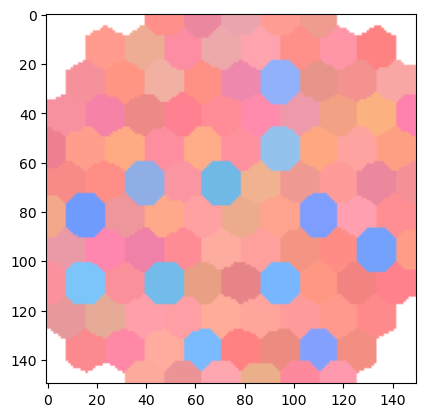

In [31]:
plt.imshow(color_code_cells(GRIDS_NULL[-4][1], TYPES[-4][1]))